# Introduction

This is my first attempt to kaggle script and I choosed this dataset because I'm already familiar with it. <br />
I looked at some Kaggler script and I liked how some of them documented and splitted the explanatory process. <br />
So, I will try my best to learn and improve my skills and any feedback is welcome.

Here is some of scripts that I based:
* https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
* https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/run/447794

# Loading the data

In [1]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [285]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [286]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

**Here I'll just separate the features and labels.**

In [247]:
X, y = train.drop(['Survived'], axis=1), train['Survived']

In [234]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing
## Dealing with missing values

**Let's take a look at the summary of the dataset**

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


**There are 891 entries and some of the features there are missing values.**
* Sex
* Cabin
* Embarked

Since Embarked has a few missing values, let's take a look on them.

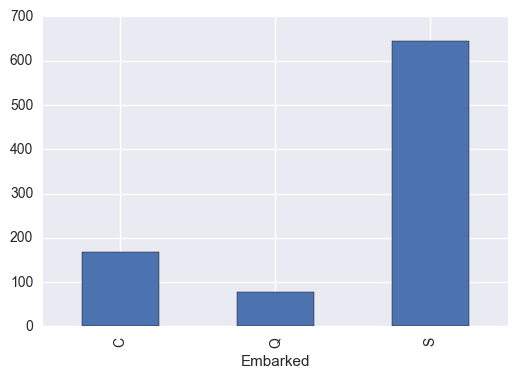

In [9]:
X.groupby('Embarked')['PassengerId'].count().plot.bar()

Since most people embarked at Southampton, I'll could just consider the NaNs as 'S'. <br />
However, I saw a Kaggler boxplotting the Fare by Pclass and Embarked concluding that the NAs could be 'C'. <br />
That's because the people in which the feature Embarked has NaN, the fare of that respective class is close to the median value. <br />
So, I'll assume as they embarked at Cherbourg.

In [173]:
X[ pd.isnull(X['Embarked']) ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


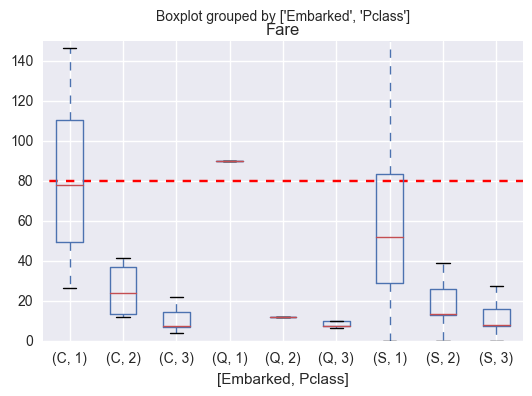

In [121]:
ax = X[['Pclass', 'Embarked', 'Fare']].boxplot(by=['Embarked','Pclass'])
ax.set_ylim(0,150)
ax.hlines(80, 0, 10, color='r', linestyles='dashed')

In [248]:
X.loc[[61,829],'Embarked'] = 'C'

Next step! <br />
Let's take a look on Age Feature

In [13]:
X.sort('Age')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


TypeError: unorderable types: str() > float()

In [ ]:
X.sort_values(by='Age', na_position='last')

In [ ]:
from pandas.tools.plotting import andrews_curves

In [ ]:
andrews_curves(train[['Fare', 'Embarked']], 'Fare')

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [ ]:
#forest.fit(X,y)

Primeiro vou agrupar por Sexo e Sobreviveu a fim de mostrar o quanto que 

In [ ]:
bySexSurvived = train.groupby(['Sex','Survived']).count().unstack()
bySexSurvived = bySexSurvived['PassengerId']
print bySexSurvived
bySexSurvived.plot.bar(color=['red', 'blue'])
#['PassengerId'].plot.bar(color=['red','blue'])

In [ ]:
sns.set(color_codes=True)

In [ ]:
sns.factorplot(data=train, x='Sex', y='Age', kind='swarm', hue='Survived', col='Pclass')

In [ ]:
sns.factorplot(data=train, x='Pclass', y='Age', kind='swarm', hue='Survived', col='Embarked')

In [ ]:
criterion = train['Embarked'].map(lambda x : x == 'Q')

In [ ]:
train[criterion & (train.Pclass == 1) ]

In [ ]:
train[train.Name.map(lambda x : x.startswith('Mina'))]

In [ ]:
test[test.Name.map(lambda x : x.startswith('Mina'))]

In [ ]:
x = train.groupby(['Ticket','Survived']).count()['PassengerId']

In [ ]:
x

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
clf = DecisionTreeClassifier()

In [278]:
clf.fit(X.drop('PassengerId', axis=1),y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [272]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [273]:
X.keys()

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'female', 'male'],
      dtype='object')

In [279]:
importance = clf.feature_importances_
print(importance)

[ 0.10817857  0.24726055  0.04894649  0.02602006  0.24395343  0.00519849
  0.00315971  0.0079475   0.          0.30933519]


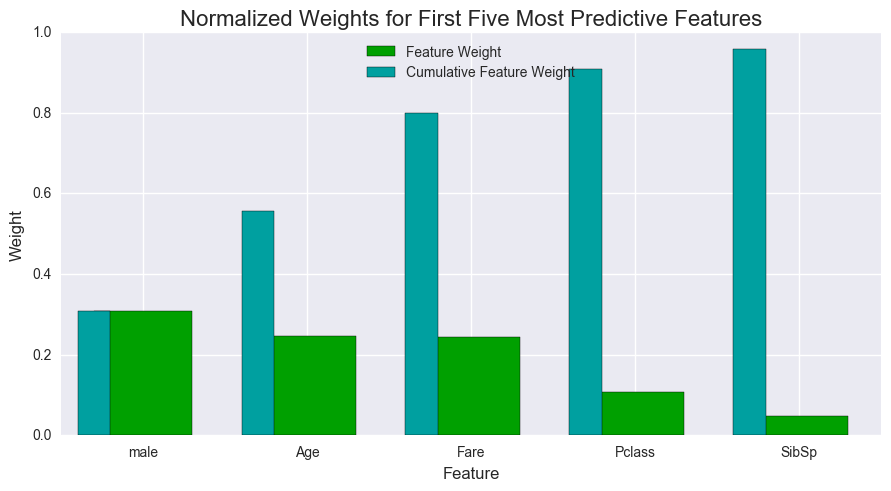

In [280]:
feature_plot(importance, X.drop('PassengerId', axis=1), y)

In [226]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

In [116]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [251]:
enc = LabelEncoder()
enc.fit(X['Embarked'])
X['Embarked'] = enc.transform(X['Embarked'])

In [252]:
ohe = OneHotEncoder()
ohe.fit(X['Embarked'].reshape(-1,1))
mat = ohe.transform(X['Embarked'].reshape(-1,1))

In [255]:
mat = DataFrame(data=mat.toarray(), columns=enc.classes_)

In [256]:
X[mat.keys()] = mat
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0.0,0.0,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,0.0,0.0,1.0


In [259]:
enc.fit(X['Sex'])
X['Sex'] = enc.transform(X['Sex'])

In [264]:
ohe.fit(X['Sex'].reshape(-1,1))
mat = ohe.transform(X['Sex'].reshape(-1,1))
mat = DataFrame(data=mat.toarray(), columns=enc.classes_)
X[mat.keys()] = mat
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,0.0,1.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0,1.0,0.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0.0,0.0,1.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0.0,0.0,1.0,1.0,0.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0.0,0.0,1.0,0.0,1.0


In [265]:
X = X.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)

In [270]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
C              891 non-null float64
Q              891 non-null float64
S              891 non-null float64
female         891 non-null float64
male           891 non-null float64
dtypes: float64(7), int64(4)
memory usage: 76.6 KB


In [267]:
rows = X[ pd.isnull(X['Age']) ].index

In [268]:
X.loc[rows,'Age'] = X['Age'].mean()